In [23]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.0.0-alpha0'

In [0]:
!pip uninstall tensorflow
!pip uninstall tensorflow-gpu
!pip install tensorflow-gpu==2.0.0-alpha0

Uninstalling tensorflow-gpu-2.0.0a0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_gpu-2.0.0a0.dist-info/*
Proceed (y/n)? 

In [0]:
import tensorflow as tf
tf.__version__


In [29]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(num_classes,activation='softmax'))


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
x_train=x_train.flatten().reshape(50000,3072)
x_test=x_test.flatten().reshape(10000,3072)

x_mean = np.mean(x_train,axis=0)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalization           
x_train -= x_mean
x_test -= x_mean
                         
# feature scaling                        
x_train /= 255
x_test /= 255

x_train = x_train.flatten().reshape(50000,32,32,3)
x_test=x_test.flatten().reshape(10000,32,32,3)

                         
model.fit(x_train,y_train,epochs=5)


# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Epoch 1/5
50000/50000 [==============================] - 5s 99us/sample - loss: 1.8276 - accuracy: 0.3693
Epoch 2/5
50000/50000 [==============================] - 4s 88us/sample - loss: 1.7601 - accuracy: 0.3955
Epoch 3/5
50000/50000 [==============================] - 8s 158us/sample - loss: 1.7433 - accuracy: 0.4028
Epoch 4/5
50000/50000 [==============================] - 8s 160us/sample - loss: 1.7308 - accuracy: 0.4055
Epoch 5/5
50000/50000 [==============================] - 9s 185us/sample - loss: 1.7216 - accuracy: 0.4109
Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 1s 138us/sample - loss: 1.7939 - accuracy: 0.3789
Test loss: 1.7939217008590698
Test accuracy: 0.3789


In [30]:
model.layers

# Get weights from softmax layer

In [31]:
weights = model.layers[1].get_weights()[0]
weights = weights.flatten().reshape(32,32,3,10)
max_w = weights.max()
min_w = weights.min()
max_w


0.29153076

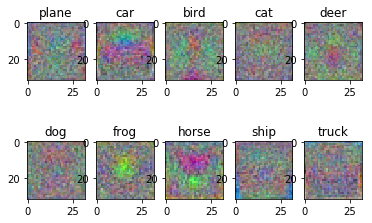

In [33]:
import matplotlib.pyplot as plt
plt.figure()

for i in range(numclass):
  plt.subplot(2, 5, i+1)
  plt.title(class_names[i])
  # Scale weight to 0 - 255
  wPlot = 255.0 * (weights[:, :, :, i].squeeze() - min_w) / (max_w - min_w)
  plt.imshow(wPlot.astype('uint8'))
plt.savefig('visualizer.png')

In [217]:
my_w = weights[:,:,:,1]
max_w = np.max(my_w)
min_w = np.min(my_w)
pltweight = (my_w-min_w)/(max_w-min_w)*255
#plt.imshow(pltweight)
pltweight.min()

0.0

SKlearn softmax

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import MinMaxScaler
import os

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000,3072)
Scaler = MinMaxScaler().fit(x_train)

x_train = Scaler.transform(x_train)
x_test = x_test.reshape(10000,3072)
x_test = Scaler.transform(x_test)




In [25]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=25)
model.fit(x_train,y_train)
y_pred = model.predict(x_test.reshape(10000,3072))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [26]:
accuracy_score(y_test,y_pred)

0.3769

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


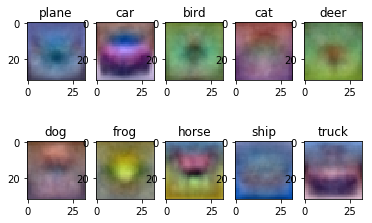

In [27]:
import matplotlib.pyplot as plt
import numpy as np
numclass = 10
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
max_w = np.max(model.coef_)
min_w = np.min(model.coef_)


plt.figure()

for i in range(numclass):
  plt.subplot(2, 5, i+1)
  plt.title(class_names[i])
  ith_weight = model.coef_[i].reshape(32,32,3)
  plt.title(class_names[i])
  # Scale weight to 0 - 255
  wPlot = 255*(ith_weight - min_w)/(max_w-min_w)
  print(wPlot.shape)
  plt.imshow(wPlot.astype('uint8'))
plt.savefig('visualizer.png')

In [178]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
class_n = 9
plt.imshow(255*((weights[1][0][:,class_n].reshape(32,32,3)))+np.max(weights[1][0][:,class_n].reshape(32,32,3)))#+weights[1][1][class_n]))

NameError: ignored

In [0]:
np.min(255*((weights[1][0][:,class_n].reshape(32,32,3))-np.min(weights[1][0][:,class_n].reshape(32,32,3))))

0.0

In [140]:
np.mean(x_train,axis=1)

array([[[135.5    , 104.8125 ,  69.8125 ],
        [127.6875 ,  87.9375 ,  40.90625],
        [132.34375,  93.9375 ,  46.125  ],
        ...,
        [137.0625 , 107.25   ,  54.71875],
        [124.9375 ,  93.65625,  47.5625 ],
        [118.9375 ,  90.78125,  51.8125 ]],

       [[140.     , 141.03125, 147.53125],
        [135.75   , 143.28125, 156.5625 ],
        [116.90625, 125.53125, 137.5    ],
        ...,
        [114.84375, 108.25   ,  91.96875],
        [112.0625 , 107.15625,  90.53125],
        [115.9375 , 112.34375,  99.34375]],

       [[173.     , 178.     , 168.5625 ],
        [168.125  , 172.59375, 164.65625],
        [171.03125, 173.0625 , 167.3125 ],
        ...,
        [136.6875 , 144.40625, 139.65625],
        [133.71875, 141.40625, 136.59375],
        [133.40625, 141.09375, 136.28125]],

       ...,

       [[ 88.875  , 117.59375, 122.25   ],
        [ 79.28125, 112.53125, 123.28125],
        [ 77.96875, 113.0625 , 123.625  ],
        ...,
        [ 73.78125,  91.65

In [0]:
x_train_phat = x_train.copy().flatten().reshape(50000,3072)

In [0]:
mymean = np.mean(x_train_phat,axis=0)
x_train_phat -= mymean

In [183]:
np.max(x_train_phat)

0.60786617